In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

<Axes: >

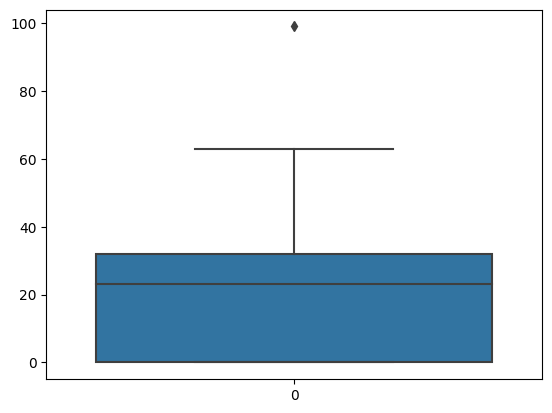

In [9]:
sns.boxplot(data= df['SkinThickness']) 

In [13]:
Q1 = df["SkinThickness"].quantile(0.25)
Q3 = df["SkinThickness"].quantile(0.75)

In [14]:
IQR = Q3 - Q1

In [15]:
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

In [16]:
df = df[(df['SkinThickness'] >= LB) & (df['SkinThickness'] <= UB)]

<Axes: >

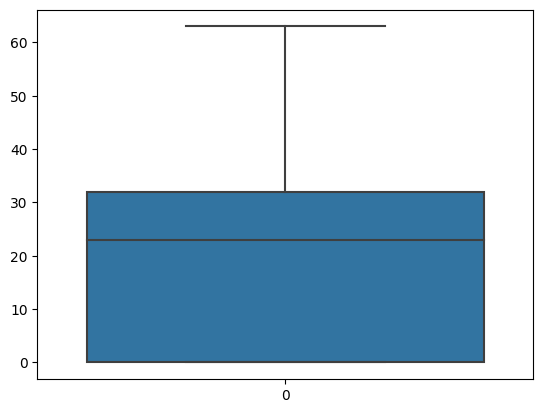

In [17]:
sns.boxplot(data= df['SkinThickness']) 

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
x = df.drop("Outcome", axis = 1)

In [21]:
y = df["Outcome"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
train_scores = []
test_scores = []

In [28]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [29]:
y_pred = knn.predict(x_test)

In [33]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [34]:
confusion_matrix(y_test, y_pred)

array([[87, 17],
       [21, 29]], dtype=int64)

In [36]:
recall_score(y_test, y_pred)


0.58

In [37]:
precision_score(y_test, y_pred)

0.6304347826086957

In [38]:
f1_score(y_test, y_pred)

0.6041666666666666